# Linear Regression Project 

## Introduction

Ce projet est tourné vers le Machine Learning et l'utilisation de simple régression linéaire.
Le dataset utilisé et trouvé sur kaggle informe sur l'âge et l'assurance associée.

## Importation des données

In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download latest version
path = kagglehub.dataset_download("taseermehboob9/insurance-dataset-simple-linear-regression")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████████████████| 254/254 [00:00<?, ?B/s]

Extracting files...
Path to dataset files: C:\Users\namdn\.cache\kagglehub\datasets\taseermehboob9\insurance-dataset-simple-linear-regression\versions\1


## Analyse

In [4]:
df = pd.read_csv('simplelinearregression.csv')

In [26]:
df

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000
5,31,26500
6,33,27000


In [9]:
df.isnull().sum()

Age        0
Premium    0
dtype: int64

In [6]:
df.describe()

,Age,Premium
count,7.000000,7.000000
mean,25.857143,20214.285714
std,5.273474,6283.955382
min,18.000000,10000.000000
25%,22.500000,16500.000000
50%,26.000000,21000.000000
75%,29.500000,25250.000000
max,33.000000,27000.000000


In [76]:
X = df['Age'].values
y = df['Premium'].values

Text(0, 0.5, 'Premium')

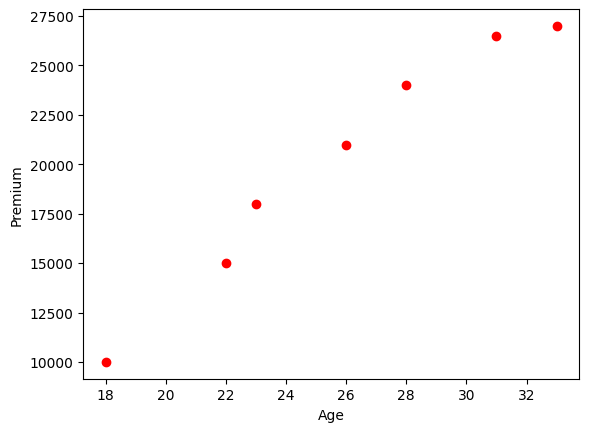

In [77]:
plt.scatter(X,y, color='red')
plt.xlabel("Age")
plt.ylabel("Premium")

In [46]:
print(X.shape, y.shape)

(7,) (7,)


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [62]:
X_train

array([31, 23, 28, 26, 33], dtype=int64)

In [63]:
X_test

array([18, 22], dtype=int64)

In [64]:
y_train

array([26500, 18000, 24000, 21000, 27000], dtype=int64)

In [65]:
y_test

array([10000, 15000], dtype=int64)

Reshape des arrays pour adapter à la standardisation

In [84]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [86]:
X_train, X_test

(array([[ 0.79006571],
        [-1.46726488],
        [-0.05643326],
        [-0.62076591],
        [ 1.35439836]]),
 array([[-2.8780965 ],
        [-1.74943121]]))

In [87]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

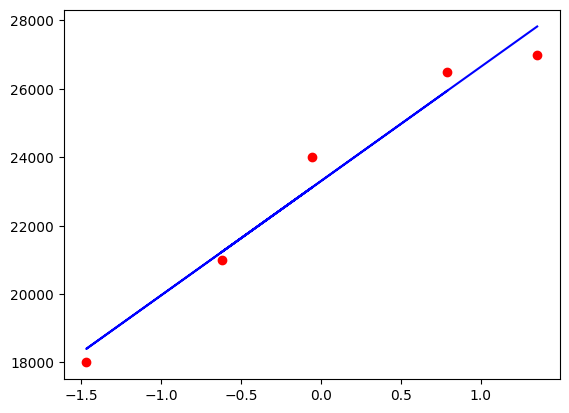

In [94]:
plt.scatter(X_train,y_train,color="red")
plt.plot(X_train,reg.predict(X_train),color="blue")
plt.show()

In [74]:
print(reg.coef_)
print(reg.intercept_)

[3340.84927606]
23300.0


### Calcul de R^2

In [83]:
from sklearn.metrics import r2_score

y_pred = reg.predict(X_test)

r2 = r2_score(y_test, y_pred) 

print(r2)

-0.5684936508580487
